In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading the data

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255
X_train.shape

(60000, 28, 28)

In [3]:
Y_train.shape

(60000,)

### Building the model

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

### Compiling the model

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

### Training the model

In [17]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2968 - accuracy: 0.9131 - val_loss: 0.1442 - val_accuracy: 0.9555
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1420 - accuracy: 0.9578 - val_loss: 0.0973 - val_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1078 - accuracy: 0.9679 - val_loss: 0.0880 - val_accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9735 - val_loss: 0.0857 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0756 - accuracy: 0.9776 - val_loss: 0.0733 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0656 - accuracy: 0.9795 - val_loss: 0.0737 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9815 - val_loss: 0.0738 - val_accuracy:

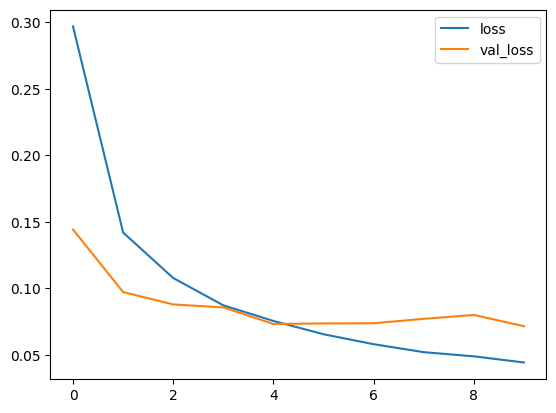

In [18]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

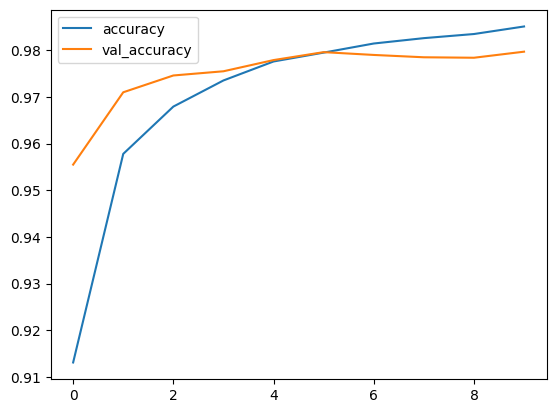

In [19]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
# plt.ylim(0.9, 1)
plt.legend()
plt.show()

In [21]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9797


[0.07163821160793304, 0.9797000288963318]

### Plotting confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

In [35]:
def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap = plt.cm.Blues) :
    """
    This function prints and plots the confusion matrix
    """
    if normalize :
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized Confusion matrix')
    else:
        print(cm)
        
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    plt.show()

313/313 [==============================] - 0s 1ms/step
[[ 967    0    1    1    1    1    3    1    4    1]
 [   0 1124    2    2    0    0    2    1    4    0]
 [   2    0 1000    6    3    0    1    5   14    1]
 [   0    0    3  996    0    3    0    5    2    1]
 [   0    0    1    0  964    0    8    1    1    7]
 [   2    0    0   10    0  865    5    1    7    2]
 [   2    2    1    1    2    4  943    0    3    0]
 [   2    4    7    1    0    0    0 1007    3    4]
 [   3    0    2    6    6    3    2    2  947    3]
 [   0    3    0    5    9    4    0    2    2  984]]


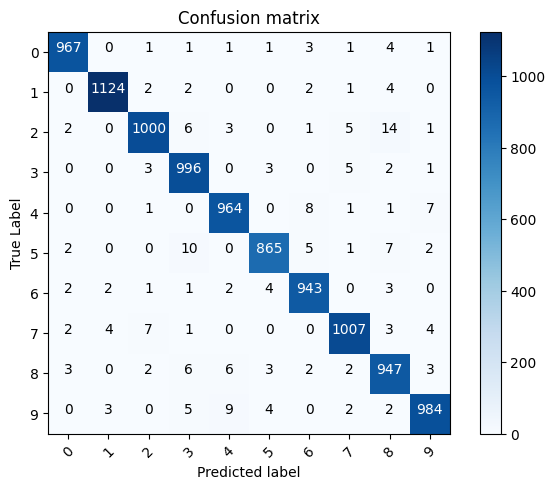

In [36]:
P_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(Y_test, P_test)
plot_confusion_matrix(cm, list(range(10)), normalize=False)

### Show some misclassified examples

Text(0.5, 1.0, 'True label: 8 Predicted : 5')

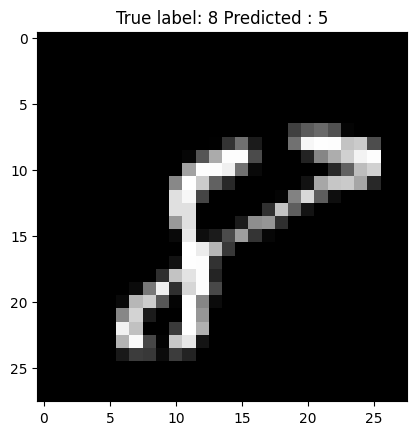

In [43]:
misclassified_idx = np.where(P_test != Y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap = 'gray')
plt.title('True label: %s Predicted : %s' % (Y_test[i], P_test[i]))